In [4]:
## Step1 查看数据

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model.logistic import LogisticRegression

# 数据加载
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/titanic_train.txt')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/titanic_test.txt')

# 数据探索
# 查看train_data信息
pd.set_option('display.max_columns', None) #显示所有列
print('查看数据信息：列名、非空个数、类型等')
print(train_data.info())
print('-'*30)
print('查看数据摘要')
print(train_data.describe())
print('-'*30)
print('查看离散数据分布')
print(train_data.describe(include=['O']))
print('-'*30)
print('查看前5条数据')
print(train_data.head())
print('-'*30)
print('查看后5条数据')
print(train_data.tail())



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


查看数据信息：列名、非空个数、类型等
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
------------------------------
查看数据摘要
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%

In [5]:
#Step 2 数据清洗

# print(train_data.isna().sum()) #-> To fill Age and Embarked
# 使用平均年龄来填充年龄中的nan值
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
# 使用票价的均值填充票价中的nan值
# train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

# print(train_data['Embarked'].value_counts())
# 使用登录最多的港口来填充登录港口的nan值
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S',inplace=True)

# 特征选择 Drop Passenger Id and Cabin
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] 
train_features = train_data[features]
train_labels = train_data['Survived']
test_features = test_data[features]

train_features['Pclass'] = train_features['Pclass'].astype('object')
# print('特征值')
print(train_features.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
#Step 3 训练模型
pd.set_option('display.max_columns', None)

# ##Alternative to DictVectorizer
!pip install dummyPy
from dummyPy import OneHotEncoder
OH=OneHotEncoder(categorical_columns=["Pclass", "Sex", "Embarked"])
OH.fit(pd.concat([train_data,test_data],sort=True))
train_features=OH.transform(train_features)
test_features=OH.transform(test_features)
print(train_features.columns.values)

# #Transform categorical values of train / test set
# dvec=DictVectorizer(sparse=False)
# train_features=dvec.fit_transform(train_features.to_dict(orient='record'))
# test_features=dvec.transform(test_features.to_dict(orient='record'))
# print(dvec.feature_names_)

# 构造Model
# clf = DecisionTreeClassifier(criterion='entropy')
clf = LogisticRegression(max_iter=1000, verbose=False, random_state=33, tol=1e-4)
# 训练
clf.fit(train_features, train_labels)
# 预测
pred_labels = clf.predict(test_features)

# 得到准确率
acc_decision_tree = round(clf.score(train_features, train_labels), 6)
print(u'score准确率为 %.4lf' % acc_decision_tree)

# 使用K折交叉验证 统计准确率
print(u'cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels, cv=10)))


  Created wheel for dummyPy: filename=dummyPy-0.3-cp36-none-any.whl size=3581 sha256=68499bbed7b833e4d5757d6112425706f1057b5848778f5e803dede8d8655799
  Stored in directory: /root/.cache/pip/wheels/a0/7f/e6/26c6a4532944c2dca7130ae56263adc0b002a5de9e9ae6fb4b
Successfully built dummyPy
['Pclass_1' 'Pclass_2' 'Pclass_3' 'Sex_female' 'Sex_male' 'Age' 'SibSp'
 'Parch' 'Fare' 'Embarked_C' 'Embarked_Q' 'Embarked_S']
score准确率为 0.8047
cross_val_score准确率为 0.8002


[ 73.3440561    8.07220257 -81.06456694 100.         -99.64830827
  -2.85552667 -23.87036426  -7.11870517   0.20183428  12.15867817
   8.69028444 -20.49727088]


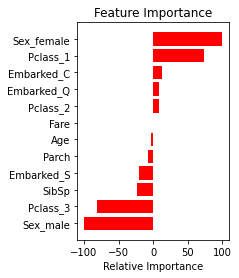

In [7]:
# Step 4 查看重要特征

def show_feature_importance(feature_list, feature_importance):
	# 设定阈值
	fi_threshold = 20
	# 重要特征的下标
	important_idx = np.where(feature_importance != fi_threshold)[0]
  
	# 特征名称
	important_features = [feature_list[i] for i in important_idx]
  
	# 重要特征
	sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
	# 可视化
	pos = np.arange(sorted_idx.shape[0]) + 0.5
	plt.subplot(1, 2, 2)
	plt.title('Feature Importance')
	plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], color='r',align='center')
	plt.yticks(pos, [important_features[i] for i in sorted_idx[::-1]])
	plt.xlabel('Relative Importance')
	plt.draw()
	plt.show()
 
 # 获取特征重要性
# feature_importance = clf.feature_importances_[0]
feature_importance = clf.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
print(feature_importance)

# 重要特征可视化
import matplotlib.pyplot as plt
# show_feature_importance(dvec.feature_names_, feature_importance)
show_feature_importance(train_features.columns.values, feature_importance)

In [8]:

# Step 5 使用TPOT自动机器学习工具
!pip install tpot
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, train_size=0.75, test_size=0.25)

# 训练
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_titanic_pipeline.py')


Generation 1 - Current best internal CV score: 0.8069240264841208
Generation 2 - Current best internal CV score: 0.8129053978229155
Generation 3 - Current best internal CV score: 0.8129053978229155
Generation 4 - Current best internal CV score: 0.8129053978229155
Generation 5 - Current best internal CV score: 0.8129166199079789

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=1.0, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
0.8340807174887892
